In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler,RobustScaler,Normalizer

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


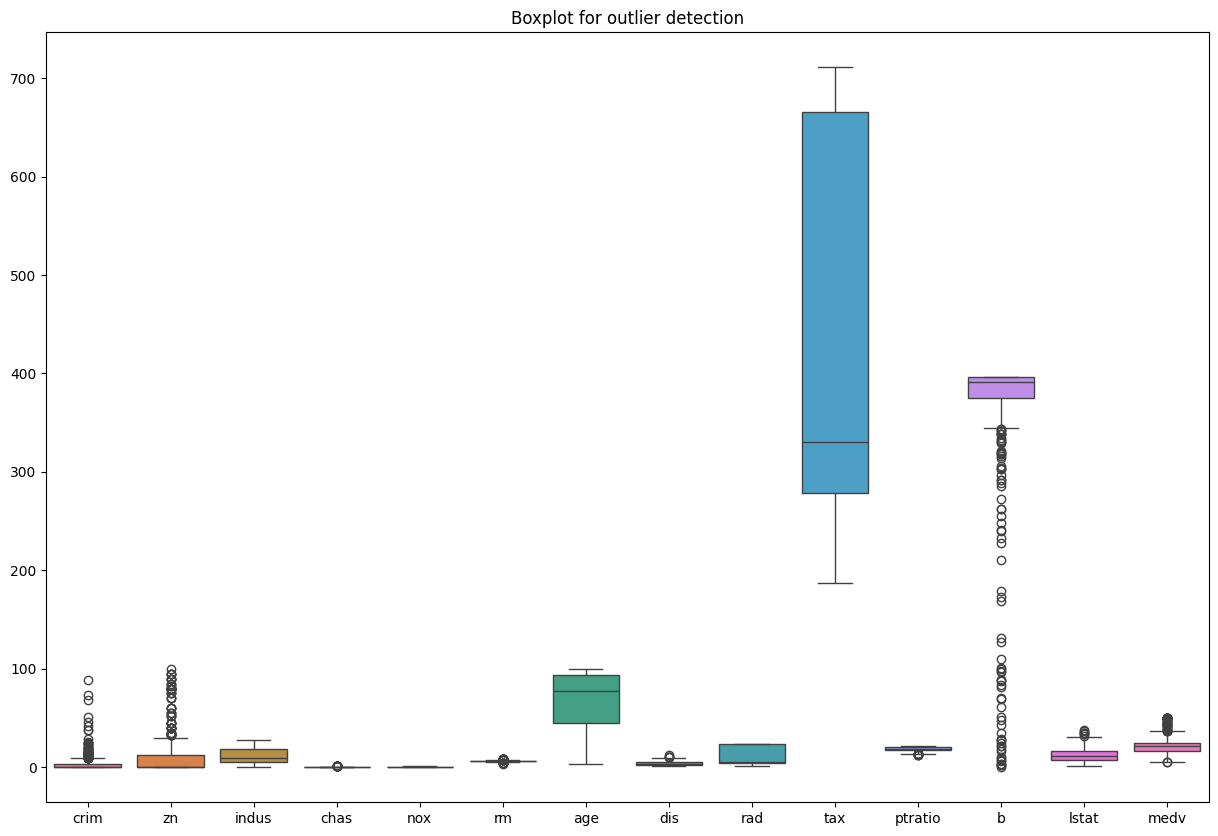

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(df)
plt.title("Boxplot for outlier detection")
plt.show()


In [29]:
def detect_outliers(df):
    outlier = []
    Q1 = np.percentile(df,25)
    Q3 = np.percentile(df,75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outlier = ((df < lower_bound) | (df > upper_bound))
    print(outlier)
    return outlier

outlier_count = df.apply(detect_outliers)
print(outlier_count)

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: crim, Length: 506, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: zn, Length: 506, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: indus, Length: 506, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: chas, Length: 506, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: nox, Length: 506, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    Fals

In [ ]:
def detect_outliers2(df):
    Q1 = np.percentile(df,25)
    Q3 = np.percentile(df,75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return ((df < lower_bound) | (df > upper_bound))

outlier_mask = df.apply(detect_outliers2)

for column in df.columns:
    median = df[column].median()
    df.loc[outlier_mask[column],column] = median

<>:4: SyntaxWarning: invalid escape sequence '\L'
<>:4: SyntaxWarning: invalid escape sequence '\L'
C:\Users\Steve\AppData\Local\Temp\ipykernel_19832\2831722173.py:4: SyntaxWarning: invalid escape sequence '\L'
  print("n\Location of outliers in the dataset:")


n\Location of outliers in the dataset:
column: 3, row: 13
column: 13, row: 0
column: 14, row: 0
column: 14, row: 11
column: 15, row: 0
column: 16, row: 0
column: 17, row: 0
column: 18, row: 0
column: 19, row: 0
column: 20, row: 0
column: 20, row: 11
column: 21, row: 0
column: 22, row: 0
column: 23, row: 0
column: 24, row: 0
column: 25, row: 0
column: 26, row: 0
column: 26, row: 11
column: 27, row: 0
column: 28, row: 0
column: 29, row: 0
column: 29, row: 11
column: 30, row: 0
column: 31, row: 0
column: 31, row: 11
column: 32, row: 0
column: 33, row: 0
column: 36, row: 11
column: 42, row: 11
column: 61, row: 11
column: 64, row: 13
column: 70, row: 11
column: 71, row: 11
column: 73, row: 11
column: 75, row: 11
column: 99, row: 5
column: 99, row: 13
column: 121, row: 11
column: 122, row: 11
column: 124, row: 11
column: 129, row: 0
column: 131, row: 0
column: 132, row: 0
column: 134, row: 0
column: 135, row: 0
column: 136, row: 11
column: 139, row: 0
column: 141, row: 5
column: 152, row: 0


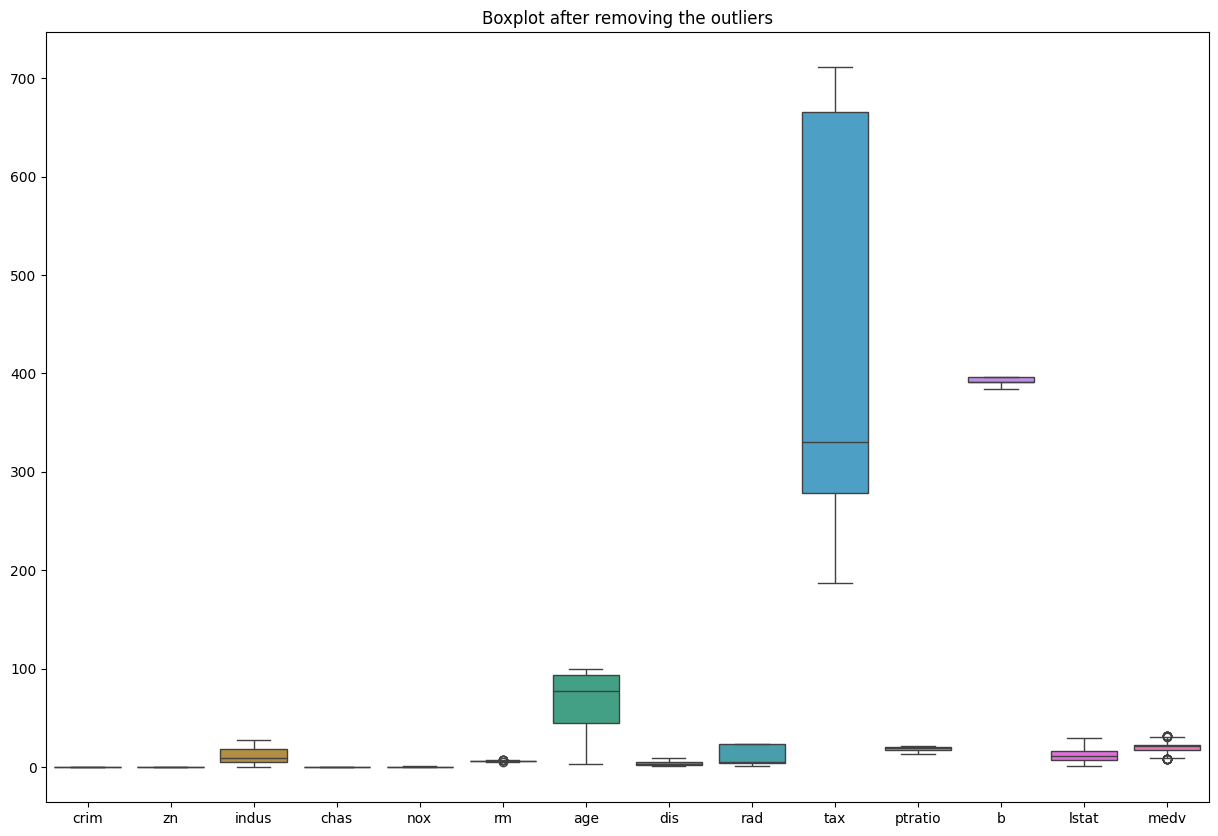

In [34]:
# find where the outliers are
outliers_indices = np.where(outlier_mask)
outlier_location = list(zip(outliers_indices[0],outliers_indices[1]))
print("n\Location of outliers in the dataset:")

for col,row in outlier_location:
    print(f"column: {col}, row: {row}")

# visuaalize the boxplot after removing the outliers
plt.figure(figsize=(15,10))
sns.boxplot(df)
plt.title("Boxplot after removing the outliers")
plt.show()